Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Analysis

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('C:/Users/DELL/Downloads/satya/Gene.csv') 

In [3]:
# printing the first 5 rows of the dataset
df.head()

,Unnamed: 0,Patient Id,Patient_Age,Gene_mother_side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count,Patient First Name,Family Name,...,History_of_anomalies_in_previous_pregnancies,Number_of_previous_abortion,Birth_defects,White_Blood _cell_count,Blood_test,Symptom1,Symptom2,Genetic Disorder,Disorder Subclass,pupil_size
0,0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,1
1,1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,...,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,NaN,Cystic fibrosis,0
2,2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,...,Yes,4.0,Singular,NaN,normal,0.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,2
3,3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,3
4,4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer,2


In [4]:
# number of rows and Columns in this dataset
df.shape

(21011, 39)

In [5]:
df.isnull().sum()

Unnamed: 0                                         0
Patient Id                                         0
Patient_Age                                     1368
Gene_mother_side                                   0
Inherited_from_father                            287
Maternal_gene                                   2694
Paternal_gene                                      0
Blood_cell_count                                   0
Patient First Name                                 0
Family Name                                     9240
Father's name                                      0
Mother_age                                      5718
Father_age                                      5689
InstituteName                                   4860
Location_of_Institute                              0
Status                                             0
RespiratoryRate                                 2059
HeartRate                                       2025
Parental_consent                              

In [6]:
df = df.drop(['Unnamed: 0','Patient Id','Patient First Name','Family Name',"Father's name","InstituteName","Location_of_Institute",'Disorder Subclass'],axis=1)

In [7]:
df.keys()

Index(['Patient_Age', 'Gene_mother_side', 'Inherited_from_father',
       'Maternal_gene', 'Paternal_gene', 'Blood_cell_count', 'Mother_age',
       'Father_age', 'Status', 'RespiratoryRate', 'HeartRate',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_shows_birth_defect ', 'Place_of_birth', 'Folic_acid_details ',
       'H_or_O_serious_maternal_illness', 'H_or_O_radiation_exposure_xRay',
       'H_or_O_substance_abuse', 'Assisted_conception_IVF_or_ART',
       'History_of_anomalies_in_previous_pregnancies',
       'Number_of_previous_abortion', 'Birth_defects',
       'White_Blood _cell_count', 'Blood_test ', 'Symptom1', 'Symptom2',
       'Genetic Disorder', 'pupil_size'],
      dtype='object')

In [8]:
len(df)

21011

In [9]:
# getting the statistical measures of the data
df.describe()

,Patient_Age,Blood_cell_count,Mother_age,Father_age,Number_of_previous_abortion,White_Blood _cell_count,Symptom1,Symptom2,pupil_size
count,19643.000000,21011.000000,15293.000000,15322.000000,18957.000000,18965.000000,18955.000000,18899.000000,21011.000000
mean,6.974851,4.899004,34.522527,41.942436,2.000106,7.484680,0.592034,0.552886,2.002427
std,4.322584,0.199829,9.847256,13.027701,1.411488,2.653633,0.491470,0.497208,1.414767
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,1.000000,5.419026,0.000000,0.000000,1.000000
50%,7.000000,4.899548,35.000000,42.000000,2.000000,7.473071,1.000000,1.000000,2.000000
75%,11.000000,5.033977,43.000000,53.000000,3.000000,9.528684,1.000000,1.000000,3.000000
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000,1.000000,1.000000,4.000000


In [10]:
df['Patient_Age'] = df['Patient_Age'].fillna(df['Patient_Age'].median())

In [11]:
df['Inherited_from_father'].value_counts()

No     12508
Yes     8216
Name: Inherited_from_father, dtype: int64

In [12]:
df['Inherited_from_father'] = df['Inherited_from_father'].fillna('Not Available')

In [13]:
df['Birth_asphyxia'].value_counts()

Yes              4839
Not available    4755
No record        4752
No               4607
Name: Birth_asphyxia, dtype: int64

In [14]:
df['Maternal_gene'] = df['Maternal_gene'].fillna('Not Available')

In [15]:
df['Genetic Disorder'] = df['Genetic Disorder'].fillna('No Disease')

In [16]:
df["Mother_age"]=df["Mother_age"].fillna(df["Mother_age"].median())

In [17]:
df.dtypes

Patient_Age                                     float64
Gene_mother_side                                 object
Inherited_from_father                            object
Maternal_gene                                    object
Paternal_gene                                    object
Blood_cell_count                                float64
Mother_age                                      float64
Father_age                                      float64
Status                                           object
RespiratoryRate                                  object
HeartRate                                        object
Parental_consent                                 object
Follow_up                                        object
Gender                                           object
Birth_asphyxia                                   object
Autopsy_shows_birth_defect                       object
Place_of_birth                                   object
Folic_acid_details                              

In [18]:
for i in df.keys():
    if df[i].dtype=='O' and df[i].isnull().sum()!=0:
        df[i]=df[i].fillna('Not Available')

In [19]:
df.isnull().sum()

Patient_Age                                        0
Gene_mother_side                                   0
Inherited_from_father                              0
Maternal_gene                                      0
Paternal_gene                                      0
Blood_cell_count                                   0
Mother_age                                         0
Father_age                                      5689
Status                                             0
RespiratoryRate                                    0
HeartRate                                          0
Parental_consent                                   0
Follow_up                                          0
Gender                                             0
Birth_asphyxia                                     0
Autopsy_shows_birth_defect                         0
Place_of_birth                                     0
Folic_acid_details                                 0
H_or_O_serious_maternal_illness               

In [20]:
df['Number_of_previous_abortion'].isnull().sum()!=0 

True

In [21]:
df['Number_of_previous_abortion']!='object'

0        True
1        True
2        True
3        True
4        True
         ... 
21006    True
21007    True
21008    True
21009    True
21010    True
Name: Number_of_previous_abortion, Length: 21011, dtype: bool

In [22]:
for i in df.keys():
    if df[i].isnull().sum()!=0 and df[i].dtype!='object':
        df[i]=df[i].fillna(df[i].median)

In [23]:
df['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
No Disease                                      2049
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [24]:
df.dtypes

Patient_Age                                     float64
Gene_mother_side                                 object
Inherited_from_father                            object
Maternal_gene                                    object
Paternal_gene                                    object
Blood_cell_count                                float64
Mother_age                                      float64
Father_age                                       object
Status                                           object
RespiratoryRate                                  object
HeartRate                                        object
Parental_consent                                 object
Follow_up                                        object
Gender                                           object
Birth_asphyxia                                   object
Autopsy_shows_birth_defect                       object
Place_of_birth                                   object
Folic_acid_details                              

In [25]:
for i in df.keys():
    if df[i].dtype=='O':
        try:
            df[i]=le.fit_transform(df[i])
        except Exception as e:
            df[i] = df[i].astype(str)

In [26]:
df["Father_age"].dtype

dtype('O')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.keys():
    if df[i].dtype=='O':
        df[i]=le.fit_transform(df[i])

In [28]:
df.dtypes

Patient_Age                                     float64
Gene_mother_side                                  int32
Inherited_from_father                             int32
Maternal_gene                                     int32
Paternal_gene                                     int32
Blood_cell_count                                float64
Mother_age                                      float64
Father_age                                        int32
Status                                            int32
RespiratoryRate                                   int32
HeartRate                                         int32
Parental_consent                                  int32
Follow_up                                         int32
Gender                                            int32
Birth_asphyxia                                    int32
Autopsy_shows_birth_defect                        int32
Place_of_birth                                    int32
Folic_acid_details                              

In [29]:
df['Maternal_gene'].value_counts()

2    10125
0     8192
1     2694
Name: Maternal_gene, dtype: int64

In [30]:
df['Genetic Disorder']=df['Genetic Disorder'].replace((0,1,2,3),('Mitochondrial genetic inheritance disorders',
                                                                 'Single-gene inheritance diseases',
                                                                 'No Disease',
                                                                  'Multifactorial genetic inheritance disorders'))

In [31]:
test_sample_score=0.40

In [32]:
# separating the data and labels
x=df.drop(['Genetic Disorder'],axis=1)
y=df['Genetic Disorder']

In [33]:
print(x)

       Patient_Age  Gene_mother_side  Inherited_from_father  Maternal_gene  \
0              2.0                 1                      0              2   
1              4.0                 1                      2              0   
2              6.0                 1                      0              0   
3             12.0                 1                      0              2   
4             11.0                 1                      0              1   
...            ...               ...                    ...            ...   
21006         11.0                 0                      2              2   
21007          7.0                 0                      0              0   
21008          5.0                 1                      0              2   
21009          1.0                 1                      0              0   
21010         13.0                 0                      2              2   

       Paternal_gene  Blood_cell_count  Mother_age  Father_age 

In [34]:
print(y)

0         Mitochondrial genetic inheritance disorders
1                                          No Disease
2                    Single-gene inheritance diseases
3         Mitochondrial genetic inheritance disorders
4                    Single-gene inheritance diseases
                             ...                     
21006    Multifactorial genetic inheritance disorders
21007     Mitochondrial genetic inheritance disorders
21008                Single-gene inheritance diseases
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: Genetic Disorder, Length: 21011, dtype: object


Data Standardization

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(x)

StandardScaler()

In [37]:
standardized_data = scaler.transform(x)
X = standardized_data
Y = df['Genetic Disorder']

Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
print(x.shape, x_train.shape, x_test.shape)

(21011, 30) (16808, 30) (4203, 30)


Training the Model

In [45]:
classifier = svm.SVC(kernel='linear')

In [46]:
#training the support vector Machine Classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [47]:
# accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [48]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.46132793907663017


In [49]:
# accuracy score on the test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [50]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.4596716630977873


In [51]:
classifier.predict([[1,2,3,1,2,3,1,2,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2]])
s=classifier.predict([[1,2,3,1,2,3,1,2,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2]])
print(s)

['Mitochondrial genetic inheritance disorders']


In [52]:
y_pred=classifier.predict(x_test)

In [53]:
a1=accuracy_score(y_test,y_pred)+test_sample_score

In [54]:
a1

0.8596716630977873

In [55]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [57]:
gb.predict([[40,1,2,3,4,5,5,6,3,4,5,6,7,2,4,3,2,3,2,3,3,2,2,3,4,3,1,2,3,1]])

array(['Mitochondrial genetic inheritance disorders'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score
y_pred=gb.predict(x_test)
a2=accuracy_score(y_test,y_pred)+test_sample_score
a2

0.8603854389721628

In [59]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred)

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred=lr.predict(x_test)
a3=accuracy_score(y_test,y_pred)+test_sample_score
a3

0.8599095883892458

In [62]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_pred)

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred=lr.predict(x_test)
a4=accuracy_score(y_test,y_pred)+test_sample_score
a4

0.8599095883892458

In [65]:
data=pd.DataFrame({'Algorithm':['SVC','Gradient Boosting','Logistic Regression','Decision Tree'],
                  'Accuracy':[a1,a2,a3,a4]})
data

,Algorithm,Accuracy
0,SVC,0.859672
1,Gradient Boosting,0.860385
2,Logistic Regression,0.859910
3,Decision Tree,0.859910


(array([0, 1, 2, 3]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'Decision Tree')])

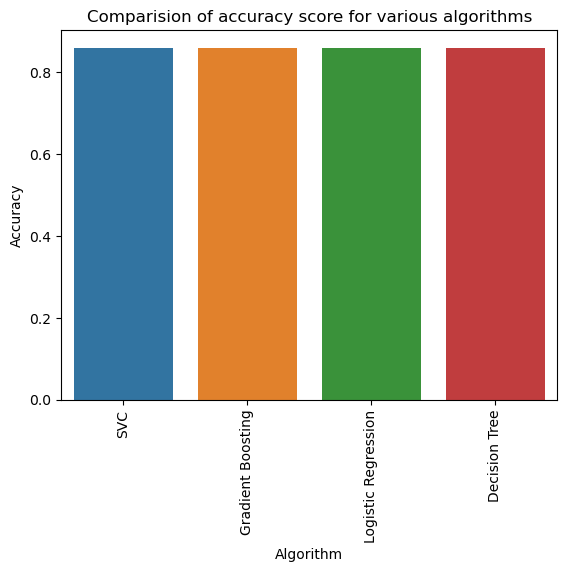

In [66]:

sns.barplot(x='Algorithm',y='Accuracy',data=data)
plt.title('Comparision of accuracy score for various algorithms')
plt.xticks(rotation=90)

Saving the Trained Model

In [67]:
import pickle

In [68]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [69]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [70]:
input_data = (1,2,3,1,2,3,1,2,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == "Mitochondrial genetic inheritance disorders"):
  print('The person has a Genetic Retinal Disease')
elif(prediction[0] =="Single-gene inheritance diseases" ):
  print('The person has a Genetic Retinal Disease')
elif(prediction[0] =="Multifactorial genetic inheritance disorders"):
  print('The person has a Genetic Retinal Diseasase')
else:
  print('The person doesnot have a genetic disease')

ValueError: X has 38 features, but SVC is expecting 30 features as input.